In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive

MyDrive


In [ ]:
from google.colab import files
uploaded = files.upload()




Saving HVSA_0_9.wav to HVSA_0_9.wav


In [ ]:
# Read data from the CSV file "sep28k-mfcc.csv" and create a DataFrame named df1
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("/content/concatenated_data.csv")
# Display the contents of the DataFrame df1
df1


,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,3,4,5,6,7,8,9,10,11,12
0,FluencyBank,107,0,0,40480,0,0,0,0,0,...,8.053312,-26.219814,-25.417568,-17.401495,-6.585725,-12.048559,-12.049847,-9.203171,-15.072798,-11.013801
1,FluencyBank,107,0,0,40480,0,0,0,0,0,...,8.053312,-26.219814,-25.417568,-17.401495,-6.585725,-12.048559,-12.049847,-9.203171,-15.072798,-11.013801
2,FluencyBank,107,0,0,40480,0,0,0,0,0,...,8.053312,-26.219814,-25.417568,-17.401495,-6.585725,-12.048559,-12.049847,-9.203171,-15.072798,-11.013801
3,FluencyBank,107,0,0,40480,0,0,0,0,0,...,8.053312,-26.219814,-25.417568,-17.401495,-6.585725,-12.048559,-12.049847,-9.203171,-15.072798,-11.013801
4,FluencyBank,107,0,0,40480,0,0,0,0,0,...,8.053312,-26.219814,-25.417568,-17.401495,-6.585725,-12.048559,-12.049847,-9.203171,-15.072798,-11.013801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31145,WomenWhoStutter,109,35,25793600,25841600,0,0,0,0,0,...,20.143100,-26.160055,3.709430,-15.719262,2.436124,-1.615821,-5.105482,-10.272832,-3.074108,-6.375842
31146,WomenWhoStutter,109,36,26168480,26216480,0,0,1,1,3,...,29.588446,-10.896356,-14.222120,-9.167952,-1.676773,-8.374956,-6.297094,1.265485,-4.014943,-0.196149
31147,WomenWhoStutter,109,37,3569440,3617440,0,0,0,0,0,...,9.234287,-27.815252,-5.439774,-17.093494,-8.942731,-1.638087,-3.736744,-0.968271,-7.699818,0.135875
31148,WomenWhoStutter,109,38,28479840,28527840,0,0,1,0,0,...,26.443172,-24.452423,-10.057486,-10.132099,-4.451933,-1.437802,-11.729773,-6.692394,0.137587,-3.664662


#Change values to 0 or 1
## 0,1=1 and 2,3=1

In [ ]:
# Columns to transform
columns_to_transform = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

# Function to transform the values
def transform_value(value):
    if value in [0, 1]:
        return 0
    elif value in [2, 3]:
        return 1
    else:
        return value

# Apply the transformation
for column in columns_to_transform:
    df1[column] = df1[column].apply(transform_value)

print(df1)

                  Show  EpId  ClipId     Start      Stop  Unsure  \
0          FluencyBank   107       0         0     40480       0   
1          FluencyBank   107       0         0     40480       0   
2          FluencyBank   107       0         0     40480       0   
3          FluencyBank   107       0         0     40480       0   
4          FluencyBank   107       0         0     40480       0   
...                ...   ...     ...       ...       ...     ...   
31145  WomenWhoStutter   109      35  25793600  25841600       0   
31146  WomenWhoStutter   109      36  26168480  26216480       0   
31147  WomenWhoStutter   109      37   3569440   3617440       0   
31148  WomenWhoStutter   109      38  28479840  28527840       0   
31149  WomenWhoStutter   109      39  29318080  29366080       0   

       PoorAudioQuality  Prolongation  Block  SoundRep  ...          3  \
0                     0             0      0         0  ...   8.053312   
1                     0            

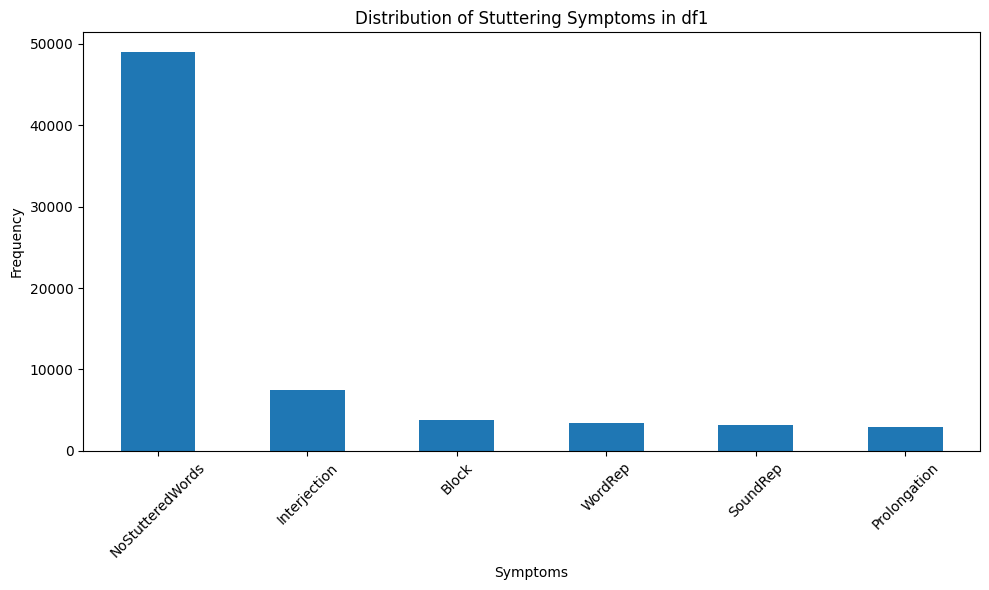

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract only the stuttering-related columns
stuttering_columns = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection','NoStutteredWords']

# Sum up the occurrences of each symptom
symptom_counts_df1 = df1[stuttering_columns].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
symptom_counts_df1.plot(kind='bar')
plt.title('Distribution of Stuttering Symptoms in df1')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

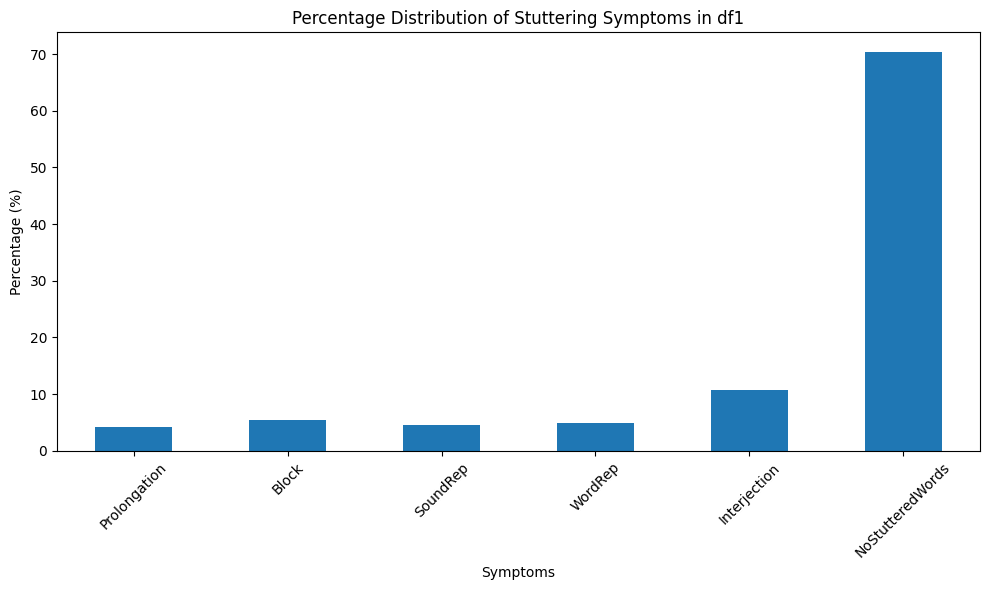

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataframe (Assuming it's already loaded as df1)
# df1 = pd.read_csv('your_dataset.csv')

# Calculate the percentage of each symptom
symptom_percentages = (df1[stuttering_columns].sum() / df1[stuttering_columns].sum().sum()) * 100

# Plotting the percentages
plt.figure(figsize=(10, 6))
symptom_percentages.plot(kind='bar')
plt.title('Percentage Distribution of Stuttering Symptoms in df1')
plt.xlabel('Symptoms')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Assuming df1 is your dataframe with the stuttering data
symptom_counts_df1 = df1[['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection','NoStutteredWords']].sum()
print(symptom_counts_df1)

Prolongation         2890
Block                3732
SoundRep             3207
WordRep              3405
Interjection         7437
NoStutteredWords    48959
dtype: int64


In [ ]:
# Assuming df1 is your dataframe with the stuttering data
symptom_counts_df1 = df1[['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection','NoStutteredWords']].applymap(lambda x: 1 if x >= 1 else 0).sum()
print(symptom_counts_df1)

Prolongation         2890
Block                3732
SoundRep             3207
WordRep              3405
Interjection         7437
NoStutteredWords    22474
dtype: int64


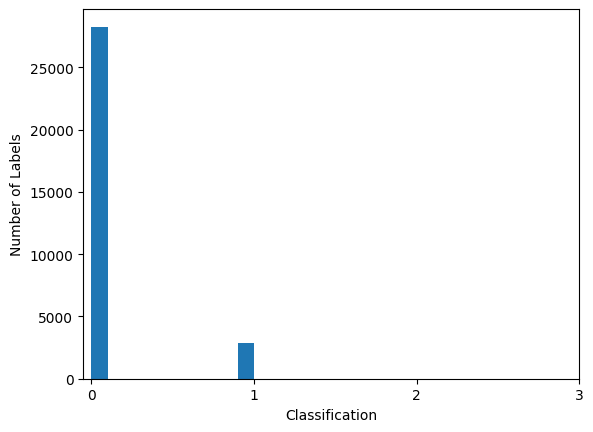

In [ ]:
# Create the histogram
plt.hist(df1["Prolongation"])

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])

# Labeling the axes
plt.xlabel("Classification")
plt.ylabel("Number of Labels")

# Show the plot
plt.show()


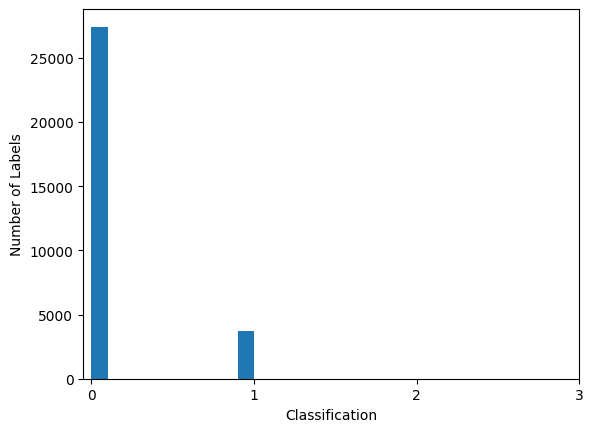

In [ ]:
# Create the histogram
plt.hist(df1["Block"])

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])

# Labeling the axes
plt.xlabel("Classification")
plt.ylabel("Number of Labels")

# Show the plot
plt.show()

In [ ]:
# Counting the occurrences of each label in the 'block' column
label_counts = df1['Block'].value_counts()

print(label_counts)

Block
0    27418
1     3732
Name: count, dtype: int64


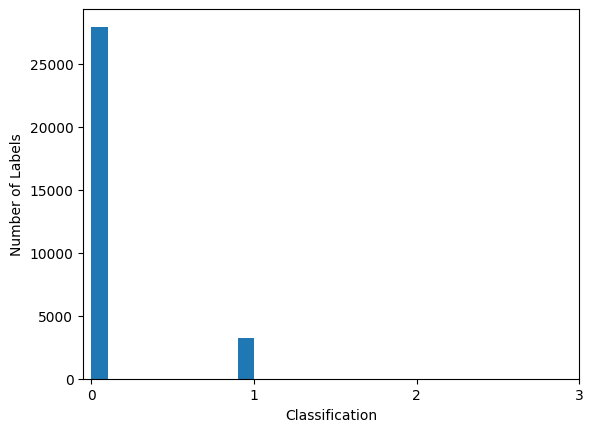

In [ ]:
# Create the histogram
plt.hist(df1["SoundRep"])

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])

# Labeling the axes
plt.xlabel("Classification")
plt.ylabel("Number of Labels")

# Show the plot
plt.show()

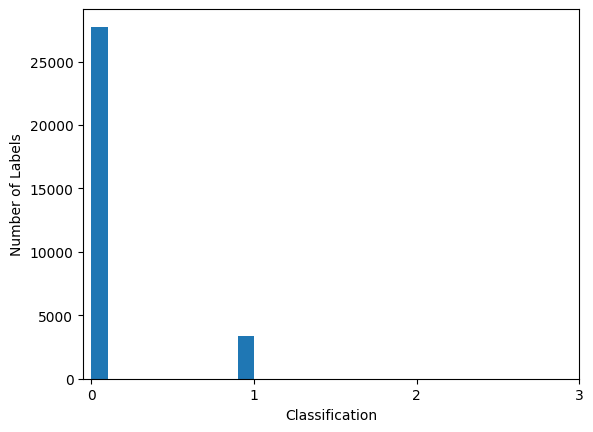

In [ ]:
# Create the histogram
plt.hist(df1["WordRep"])

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])

# Labeling the axes
plt.xlabel("Classification")
plt.ylabel("Number of Labels")

# Show the plot
plt.show()

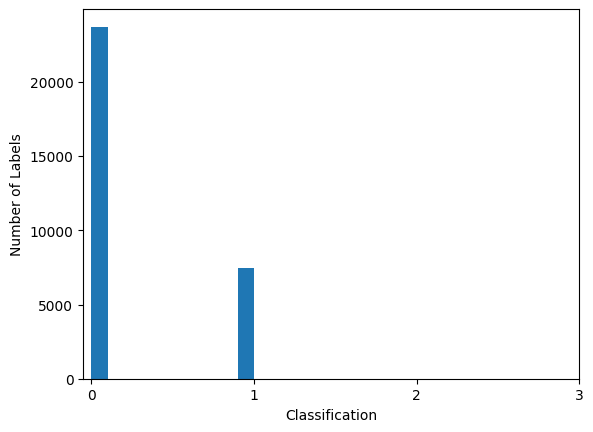

In [ ]:
# Create the histogram
plt.hist(df1["Interjection"])

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])

# Labeling the axes
plt.xlabel("Classification")
plt.ylabel("Number of Labels")

# Show the plot
plt.show()

(array([27943.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3207.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

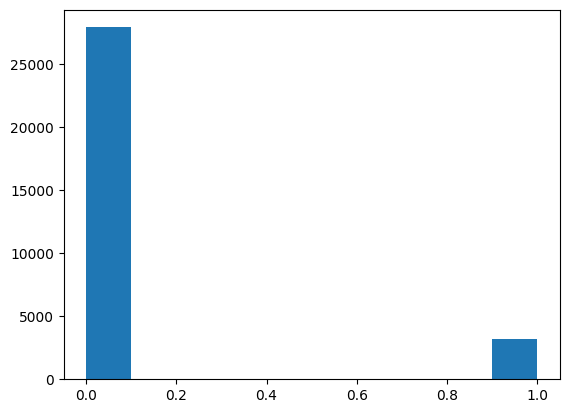

In [ ]:
plt.hist(df1["SoundRep"])

In [ ]:
from sklearn.utils import resample

# Separate the dataset into classes based on all the labels
df_11111 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_11110 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_11101 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_11100 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]
df_11011 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_11010 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_11001 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_11000 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]

df_10111 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_10110 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_10101 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_10100 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]
df_10011 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_10010 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_10001 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_10000 = df1[(df1["Prolongation"] == 1) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]

df_01111 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_01110 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_01101 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_01100 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]
df_01011 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_01010 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_01001 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_01000 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 1) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]

df_00111 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_00110 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_00101 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_00100 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 1) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]
df_00011 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 1)]
df_00010 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 1) & (df1["Interjection"] == 0)]
df_00001 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 1)]
df_00000 = df1[(df1["Prolongation"] == 0) & (df1["Block"] == 0) & (df1["SoundRep"] == 0) & (df1["WordRep"] == 0) & (df1["Interjection"] == 0)]


df_11111_upsample = resample(df_11111,replace=True,n_samples=1000,random_state=124)
df_11110_upsample = resample(df_11110,replace=True,n_samples=1000,random_state=123)
df_11101_upsample = resample(df_11101,replace=True,n_samples=1000,random_state=123)
df_11100_upsample = resample(df_11100,replace=True,n_samples=1000,random_state=123)
df_11011_upsample = resample(df_11011,replace=True,n_samples=1000,random_state=123)
df_11010_upsample = resample(df_11010,replace=True,n_samples=1000,random_state=123)
df_11001_upsample = resample(df_11001,replace=True,n_samples=1000,random_state=123)
df_11000_upsample = resample(df_11000,replace=True,n_samples=1000,random_state=123)

df_10111_upsample = resample(df_10111,replace=True,n_samples=1000,random_state=123)
df_10110_upsample = resample(df_10110,replace=True,n_samples=1000,random_state=123)
df_10101_upsample = resample(df_10101,replace=True,n_samples=1000,random_state=123)
df_10100_upsample = resample(df_10100,replace=True,n_samples=1000,random_state=123)
df_10011_upsample = resample(df_10011,replace=True,n_samples=1000,random_state=123)
df_10010_upsample = resample(df_10010,replace=True,n_samples=1000,random_state=123)
df_10001_upsample = resample(df_10001,replace=True,n_samples=1000,random_state=123)
df_10000_upsample = resample(df_10000,replace=True,n_samples=1000,random_state=123)

df_01111_upsample = resample(df_01111,replace=True,n_samples=1000,random_state=123)
df_01110_upsample = resample(df_01110,replace=True,n_samples=1000,random_state=123)
df_01101_upsample = resample(df_01101,replace=True,n_samples=1000,random_state=123)
df_01100_upsample = resample(df_01100,replace=True,n_samples=1000,random_state=123)
df_01011_upsample = resample(df_01011,replace=True,n_samples=1000,random_state=123)
df_01010_upsample = resample(df_01010,replace=True,n_samples=1000,random_state=123)
df_01001_upsample = resample(df_01001,replace=True,n_samples=1000,random_state=123)
df_01000_upsample = resample(df_01000,replace=True,n_samples=1000,random_state=123)

df_00111_upsample = resample(df_00111,replace=True,n_samples=1000,random_state=123)
df_00110_upsample = resample(df_00110,replace=True,n_samples=1000,random_state=123)
df_00101_upsample = resample(df_00101,replace=True,n_samples=1000,random_state=123)
df_00100_upsample = resample(df_00100,replace=True,n_samples=1000,random_state=123)
df_00011_upsample = resample(df_00011,replace=True,n_samples=1000,random_state=123)
df_00010_upsample = resample(df_00010,replace=True,n_samples=1000,random_state=123)
df_00001_upsample = resample(df_00001,replace=True,n_samples=1000,random_state=123)
df_00000_upsample = resample(df_00000,replace=True,n_samples=1000,random_state=123)


df_balanced = pd.concat([df_11111_upsample, df_11110_upsample, df_11101_upsample, df_11100_upsample,
                         df_11011_upsample, df_11010_upsample, df_11001_upsample, df_11000_upsample,
                         df_10111_upsample, df_10110_upsample, df_10101_upsample, df_10100_upsample,
                         df_10011_upsample, df_10010_upsample, df_10001_upsample, df_10000_upsample,
                         df_01111_upsample, df_01110_upsample, df_01101_upsample, df_01100_upsample,
                         df_01011_upsample, df_01010_upsample, df_01001_upsample, df_01000_upsample,
                         df_00111_upsample, df_00110_upsample, df_00101_upsample, df_00100_upsample,
                         df_00011_upsample, df_00010_upsample, df_00001_upsample, df_00000_upsample])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)
df_balanced

ValueError: high <= 0

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Assume df1 is your original DataFrame
# Define the subsets based on the specified conditions
conditions = [
    ("11111", [1, 1, 1, 1, 1]), ("11110", [1, 1, 1, 1, 0]), ("11101", [1, 1, 1, 0, 1]),
    ("11100", [1, 1, 1, 0, 0]), ("11011", [1, 1, 0, 1, 1]), ("11010", [1, 1, 0, 1, 0]),
    ("11001", [1, 1, 0, 0, 1]), ("11000", [1, 1, 0, 0, 0]), ("10111", [1, 0, 1, 1, 1]),
    ("10110", [1, 0, 1, 1, 0]), ("10101", [1, 0, 1, 0, 1]), ("10100", [1, 0, 1, 0, 0]),
    ("10011", [1, 0, 0, 1, 1]), ("10010", [1, 0, 0, 1, 0]), ("10001", [1, 0, 0, 0, 1]),
    ("10000", [1, 0, 0, 0, 0]), ("01111", [0, 1, 1, 1, 1]), ("01110", [0, 1, 1, 1, 0]),
    ("01101", [0, 1, 1, 0, 1]), ("01100", [0, 1, 1, 0, 0]), ("01011", [0, 1, 0, 1, 1]),
    ("01010", [0, 1, 0, 1, 0]), ("01001", [0, 1, 0, 0, 1]), ("01000", [0, 1, 0, 0, 0]),
    ("00111", [0, 0, 1, 1, 1]), ("00110", [0, 0, 1, 1, 0]), ("00101", [0, 0, 1, 0, 1]),
    ("00100", [0, 0, 1, 0, 0]), ("00011", [0, 0, 0, 1, 1]), ("00010", [0, 0, 0, 1, 0]),
    ("00001", [0, 0, 0, 0, 1]), ("00000", [0, 0, 0, 0, 0])
]

# Create a dictionary to hold the upsampled DataFrames
upsampled_dfs = {}

# Iterate over the conditions and resample if the size is sufficient
for label, cond in conditions:
    subset = df1[
        (df1["Prolongation"] == cond[0]) &
        (df1["Block"] == cond[1]) &
        (df1["SoundRep"] == cond[2]) &
        (df1["WordRep"] == cond[3]) &
        (df1["Interjection"] == cond[4])
    ]

    if len(subset) > 0:  # Only resample if the subset is not empty
        upsampled_dfs[label] = resample(subset, replace=True, n_samples=1000, random_state=123)

# Concatenate all the upsampled DataFrames
df_balanced = pd.concat(upsampled_dfs.values())

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced)

                   Show  EpId  ClipId     Start      Stop  Unsure  \
0           StutterTalk    56      32  28199200  28247200       0   
1       WomenWhoStutter     0     236  18379360  18427360       0   
2           StutterTalk    68      26  53418560  53466560       0   
3      MyStutteringLife     3      38  53651520  53699520       0   
4           FluencyBank   121      58   3566560   3614560       0   
...                 ...   ...     ...       ...       ...     ...   
28995       FluencyBank   147      29   4564320   4612320       0   
28996   WomenWhoStutter    42     199   1377120   1425120       0   
28997        HeStutters    22      19  46525280  46573280       0   
28998       FluencyBank   193      65  11253760  11301760       0   
28999        HeStutters     5     168  32892640  32940640       0   

       PoorAudioQuality  Prolongation  Block  SoundRep  ...          3  \
0                     1             1      1         0  ...  31.027258   
1                     0

In [ ]:
df_balanced.to_csv("balanced_data2.csv")

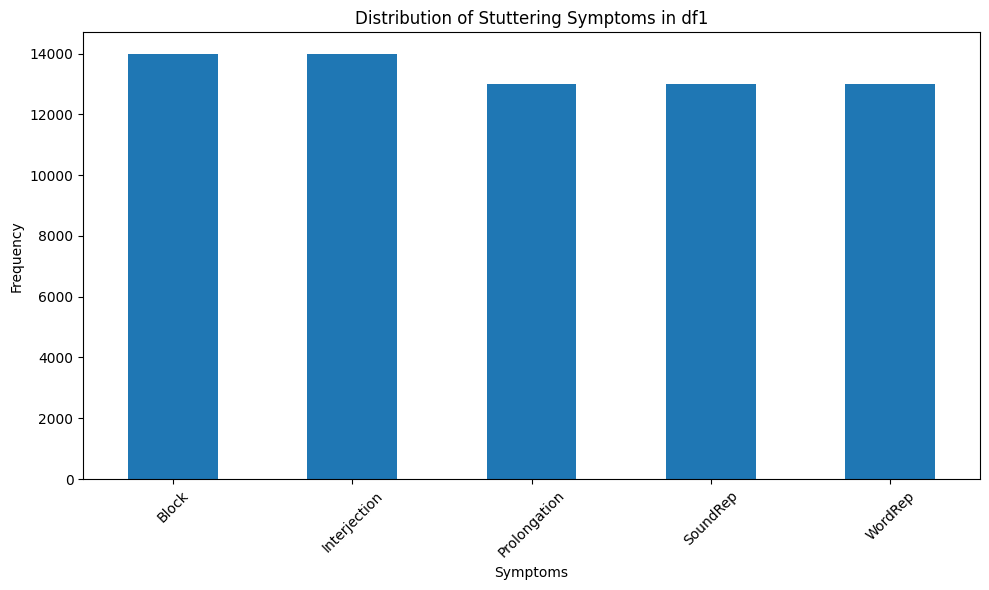

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract only the stuttering-related columns
stuttering_columns = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

# Sum up the occurrences of each symptom
symptom_counts_df1 = df_balanced[stuttering_columns].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
symptom_counts_df1.plot(kind='bar')
plt.title('Distribution of Stuttering Symptoms in df1')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

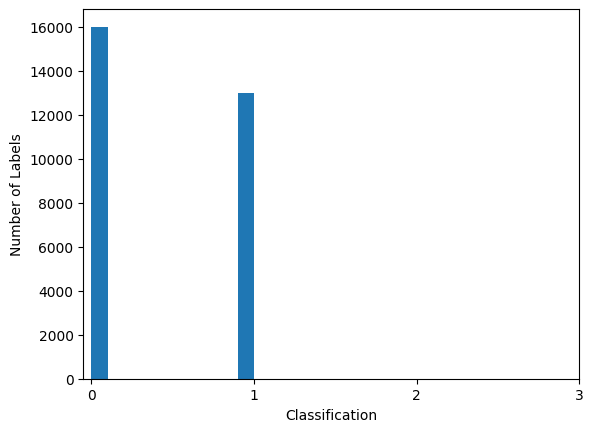

In [ ]:
# Create the histogram
plt.hist(df_balanced["Prolongation"])

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2', '3'])

# Labeling the axes
plt.xlabel("Classification")
plt.ylabel("Number of Labels")

# Show the plot
plt.show()

(array([15000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

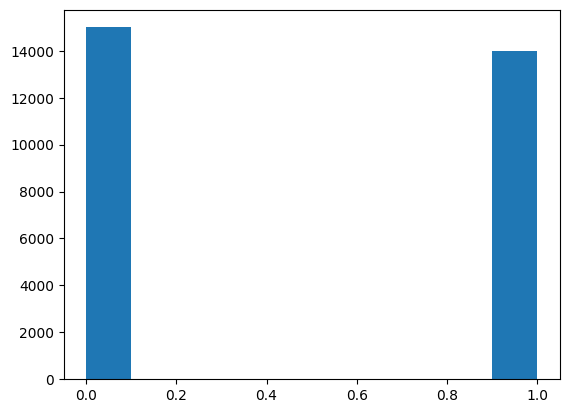

In [ ]:
plt.hist(df_balanced["Block"])

(array([16000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

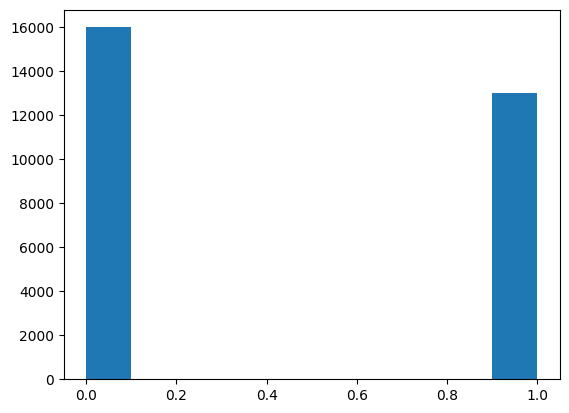

In [ ]:
plt.hist(df_balanced["SoundRep"])

(array([16000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

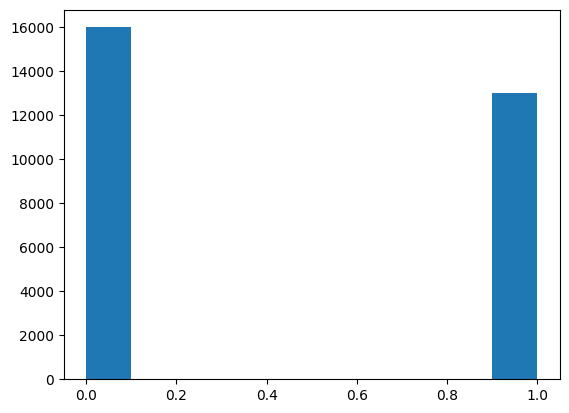

In [ ]:
plt.hist(df_balanced["WordRep"])

(array([15000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

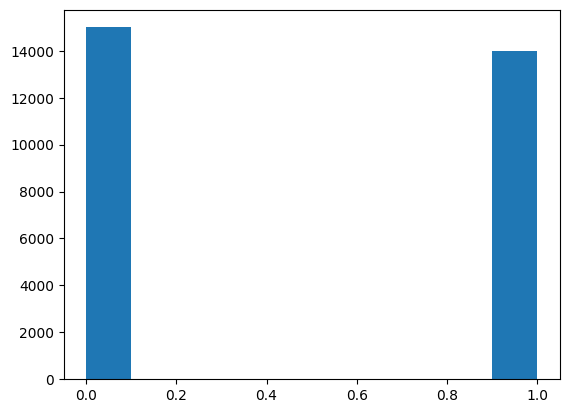

In [ ]:
plt.hist(df_balanced["Interjection"])

#CNN Model
### 70-20-10 split

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 64)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 2, 128)            0

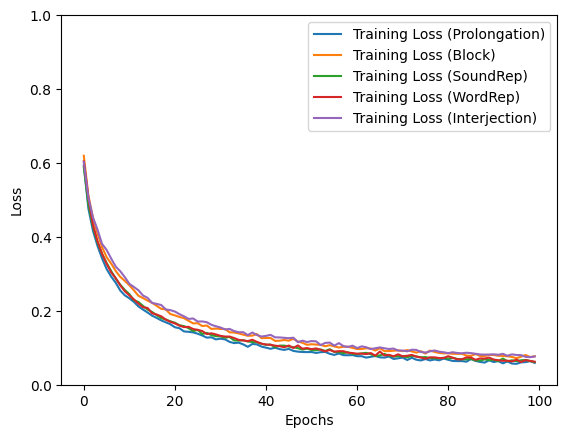

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# Define the feature and target variables
X = df_balanced.iloc[:, -13:].values  # Assuming the features are in the columns before the last 5
label_cols = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']
y = df_balanced[label_cols].values


# Split the dataset into training, validation, and testing sets (70-20-10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Further split the validation set into validation and test sets (50-50 split)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the CNN model with adjustments
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))

# Second Convolutional Layer
model.add(layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'))  # Added padding
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))

# Additional Convolutional Layer
model.add(layers.Conv1D(256, kernel_size=3, activation='relu', padding='same'))  # Added padding
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))

# Flatten layer to transition from convolutional layers to dense layers
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))

# Output layer for each label separately
output_layers = []
for _ in range(len(label_cols)):
    output_layers.append(layers.Dense(1, activation='sigmoid'))

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model summary
model.summary()

# Train the model and record history for each label
history = []
for i, output_layer in enumerate(output_layers):
    current_model = models.clone_model(model)
    current_model.add(output_layer)
    current_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    current_history = current_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1),
                                        y_train[:, i], epochs=100, batch_size=64,
                                        validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val[:, i]), verbose=1)
    history.append(current_history)

    # Evaluate the model for each label separately
    y_pred = current_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test[:, i], y_pred_binary)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test[:, i], y_pred_binary, average=None)

    print(f'Results for label: {label_cols[i]}')
    print(f'Epochs: {len(current_history.epoch)}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('\n')


# Plot the training loss over epochs for each label
for i, label in enumerate(label_cols):
    plt.plot(history[i].history['loss'], label=f'Training Loss ({label})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

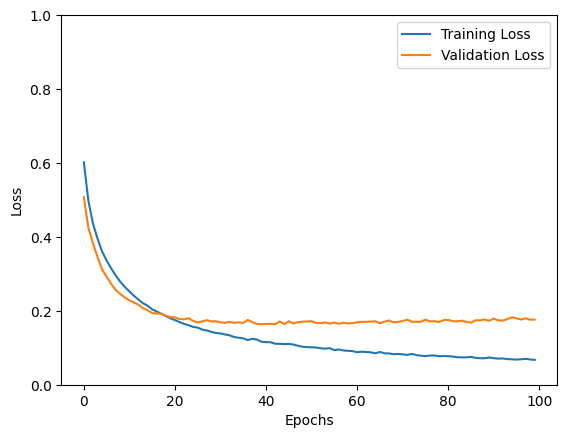

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is a list of history objects from training each label,
# where each history object has 'loss' and 'val_loss' attributes.

# Initialize lists to accumulate the losses
total_training_loss = [0] * len(history[0].history['loss'])
total_validation_loss = [0] * len(history[0].history['val_loss'])

# Accumulate the losses across all labels
for i, label in enumerate(label_cols):
    total_training_loss = [sum(x) for x in zip(total_training_loss, history[i].history['loss'])]
    total_validation_loss = [sum(x) for x in zip(total_validation_loss, history[i].history['val_loss'])]

# Convert the total sums to averages
average_training_loss = [x / len(label_cols) for x in total_training_loss]
average_validation_loss = [x / len(label_cols) for x in total_validation_loss]

# Now plot the average training and validation loss
plt.plot(average_training_loss, label='Training Loss')
plt.plot(average_validation_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 11, 64)            256       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 64)             0         
                                                                 
 conv1d_4 (Conv1D)           (None, 5, 128)            24704     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 2, 128)            0         
 g1D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 2, 128)           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

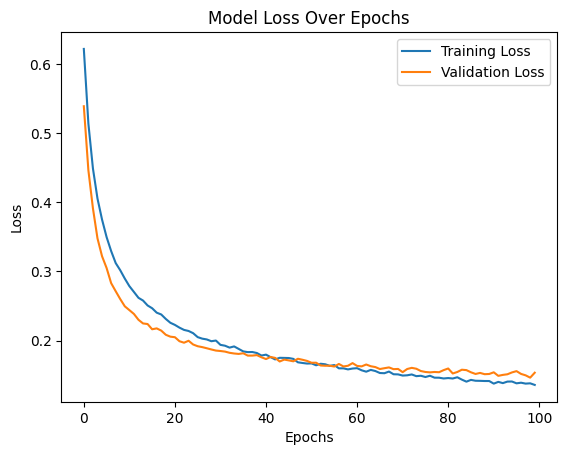

In [ ]:
# Another CNN Trail adding additional output layer designed to predict multiple labels simultaneously
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# Define the feature and target variables
X = df_balanced.iloc[:, -13:].values  # Assuming the features are in the columns before the last 5
label_cols = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']
y = df_balanced[label_cols].values


# Split the dataset into training, validation, and testing sets (70-20-10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Normalization as before
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the CNN model for multi-label classification
model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(label_cols), activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model summary
model.summary()

# Train the model
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                    epochs=100, batch_size=64,
                    validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val))

# Evaluate the model using the test set
y_pred = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Overall accuracy: {overall_accuracy:.4f}")

# Calculate accuracy, precision, recall, and F1-score for each label
report = classification_report(y_test, y_pred_binary, target_names=label_cols, output_dict=True)
print(classification_report(y_test, y_pred_binary, target_names=label_cols))

# Print accuracy for each label
for label in label_cols:
    label_accuracy = accuracy_score(y_test[:, label_cols.index(label)], y_pred_binary[:, label_cols.index(label)])
    print(f"Accuracy for {label}: {label_accuracy:.4f}")

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


#CNN Model
### 5 Fold Cross Validation

Training on fold 1...
Epoch 1/100
363/363 [==============================] - 8s 17ms/step - loss: 0.6128 - accuracy: 0.2352 - val_loss: 0.5202 - val_accuracy: 0.2821
Epoch 2/100
363/363 [==============================] - 7s 19ms/step - loss: 0.5018 - accuracy: 0.2637 - val_loss: 0.4251 - val_accuracy: 0.2633
Epoch 3/100
363/363 [==============================] - 6s 17ms/step - loss: 0.4345 - accuracy: 0.2972 - val_loss: 0.3700 - val_accuracy: 0.2714
Epoch 4/100
363/363 [==============================] - 6s 17ms/step - loss: 0.3919 - accuracy: 0.3089 - val_loss: 0.3342 - val_accuracy: 0.2819
Epoch 5/100
363/363 [==============================] - 7s 18ms/step - loss: 0.3603 - accuracy: 0.3330 - val_loss: 0.2987 - val_accuracy: 0.3759
Epoch 6/100
363/363 [==============================] - 6s 16ms/step - loss: 0.3366 - accuracy: 0.3313 - val_loss: 0.2816 - val_accuracy: 0.3617
Epoch 7/100
363/363 [==============================] - 7s 21ms/step - loss: 0.3169 - accuracy: 0.3301 - val_loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
363/363 [==============================] - 8s 18ms/step - loss: 0.6133 - accuracy: 0.2375 - val_loss: 0.5318 - val_accuracy: 0.3438
Epoch 2/100
363/363 [==============================] - 5s 13ms/step - loss: 0.5043 - accuracy: 0.2614 - val_loss: 0.4310 - val_accuracy: 0.2288
Epoch 3/100
363/363 [==============================] - 5s 14ms/step - loss: 0.4371 - accuracy: 0.2777 - val_loss: 0.3727 - val_accuracy: 0.2260
Epoch 4/100
363/363 [==============================] - 6s 16ms/step - loss: 0.3921 - accuracy: 0.2857 - val_loss: 0.3325 - val_accuracy: 0.3353
Epoch 5/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3610 - accuracy: 0.3051 - val_loss: 0.3043 - val_accuracy: 0.3588
Epoch 6/100
363/363 [==============================] - 6s 16ms/step - loss: 0.3376 - accuracy: 0.3106 - val_loss: 0.2833 - val_accuracy: 0.3243
Epoch 7/100
363/363 [==============================] - 6s 15ms/step - loss: 0.3168 - accuracy: 0.3019 - val_loss: 0.2687 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
363/363 [==============================] - 6s 14ms/step - loss: 0.6092 - accuracy: 0.2166 - val_loss: 0.5114 - val_accuracy: 0.1764
Epoch 2/100
363/363 [==============================] - 6s 17ms/step - loss: 0.4960 - accuracy: 0.2771 - val_loss: 0.4324 - val_accuracy: 0.3002
Epoch 3/100
363/363 [==============================] - 5s 13ms/step - loss: 0.4362 - accuracy: 0.2924 - val_loss: 0.3770 - val_accuracy: 0.3052
Epoch 4/100
363/363 [==============================] - 5s 14ms/step - loss: 0.3943 - accuracy: 0.2981 - val_loss: 0.3341 - val_accuracy: 0.2864
Epoch 5/100
363/363 [==============================] - 7s 19ms/step - loss: 0.3612 - accuracy: 0.3035 - val_loss: 0.3128 - val_accuracy: 0.3197
Epoch 6/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3391 - accuracy: 0.3105 - val_loss: 0.2910 - val_accuracy: 0.3529
Epoch 7/100
363/363 [==============================] - 6s 17ms/step - loss: 0.3194 - accuracy: 0.3090 - val_loss: 0.2749 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
363/363 [==============================] - 8s 17ms/step - loss: 0.6127 - accuracy: 0.2126 - val_loss: 0.5180 - val_accuracy: 0.2038
Epoch 2/100
363/363 [==============================] - 5s 14ms/step - loss: 0.5030 - accuracy: 0.2536 - val_loss: 0.4295 - val_accuracy: 0.2488
Epoch 3/100
363/363 [==============================] - 7s 18ms/step - loss: 0.4383 - accuracy: 0.2772 - val_loss: 0.3722 - val_accuracy: 0.2921
Epoch 4/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3974 - accuracy: 0.2878 - val_loss: 0.3362 - val_accuracy: 0.2686
Epoch 5/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3627 - accuracy: 0.2956 - val_loss: 0.3062 - val_accuracy: 0.3578
Epoch 6/100
363/363 [==============================] - 7s 19ms/step - loss: 0.3370 - accuracy: 0.3026 - val_loss: 0.2860 - val_accuracy: 0.2943
Epoch 7/100
363/363 [==============================] - 5s 13ms/step - loss: 0.3189 - accuracy: 0.3068 - val_loss: 0.2704 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
363/363 [==============================] - 7s 15ms/step - loss: 0.6081 - accuracy: 0.2181 - val_loss: 0.5240 - val_accuracy: 0.2600
Epoch 2/100
363/363 [==============================] - 6s 17ms/step - loss: 0.5000 - accuracy: 0.2673 - val_loss: 0.4357 - val_accuracy: 0.2595
Epoch 3/100
363/363 [==============================] - 5s 14ms/step - loss: 0.4372 - accuracy: 0.2772 - val_loss: 0.3817 - val_accuracy: 0.3298
Epoch 4/100
363/363 [==============================] - 7s 18ms/step - loss: 0.3929 - accuracy: 0.2858 - val_loss: 0.3420 - val_accuracy: 0.3121
Epoch 5/100
363/363 [==============================] - 5s 15ms/step - loss: 0.3631 - accuracy: 0.3025 - val_loss: 0.3139 - val_accuracy: 0.3414
Epoch 6/100
363/363 [==============================] - 5s 14ms/step - loss: 0.3389 - accuracy: 0.3109 - val_loss: 0.2937 - val_accuracy: 0.2948
Epoch 7/100
363/363 [==============================] - 6s 18ms/step - loss: 0.3207 - accuracy: 0.3078 - val_loss: 0.2764 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


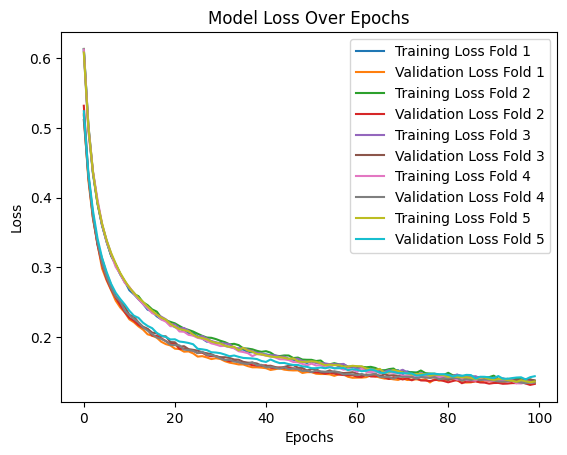

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# Define the feature and target variables
X = df_balanced.iloc[:, -13:].values  # Assuming the features are in the columns before the last 5
label_cols = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']
y = df_balanced[label_cols].values

# Normalize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the CNN model for multi-label classification
def create_model():
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),
        layers.Conv1D(256, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(len(label_cols), activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
histories = []
fold = 1

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    current_model = create_model()
    print(f"Training on fold {fold}...")

    # Train the model and record history
    history = current_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                                epochs=100, batch_size=64,
                                validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val),
                                verbose=1)
    histories.append(history)

    # Evaluate the model using the validation set
    y_pred = current_model.predict(X_val.reshape(X_val.shape[0], X_val.shape[1], 1))
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_val, y_pred_binary)
    print(f"Fold {fold} - Overall accuracy: {overall_accuracy:.4f}")

    # Calculate accuracy, precision, recall, and F1-score for each label
    print(f"Classification report for fold {fold}:")
    print(classification_report(y_val, y_pred_binary, target_names=label_cols))

    fold += 1

# Plot the training & validation loss for each fold
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')

plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [ ]:
# Save the model
model.save('CNN MultilableLAST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model
model.save('CNN Multilable3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model
model.save('CNN Multilable4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Save the scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Fit the scaler with your training data
scaler = StandardScaler()
scaler.fit(X_train)  # Make sure X_train is your training dataset

# Save the fitted scaler
joblib.dump(scaler, 'fitted_scalerLAST.pkl')

['fitted_scalerLAST.pkl']

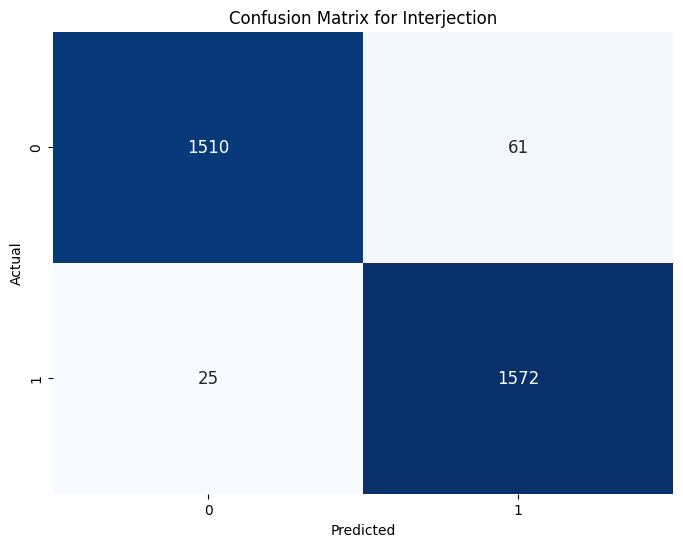

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming these are the confusion matrix numbers provided by the user
cm = np.array([[1510, 61], [25, 1572]])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 12})
plt.title('Confusion Matrix for Interjection')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Using the Model
!pip install librosa tensorflow numpy scikit-learn

In [ ]:
!pip install joblib

In [ ]:
#Feature Extraction
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd


# Define the feature and target variables
X = df_balanced.iloc[:, -13:].values  # Assuming the features are in the columns before the last 5
label_cols = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']
y = df_balanced[label_cols].values


# Split the dataset into training, validation, and testing sets (70-20-10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Further split the validation set into validation and test sets (50-50 split)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

NameError: name 'df_balanced' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

# Recreate the scaler and fit it on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Save the fitted scaler
joblib.dump(scaler, 'fitted_scaler2.pkl')

['fitted_scaler2.pkl']

In [ ]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/CNN Multilable4.h5')

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc.T


# Function to predict stuttering types for an audio file
def predict_stuttering(audio_file):
    mfcc_features = extract_mfcc_features(audio_file)
    normalized_features = scaler.transform(mfcc_features)
    reshaped_features = normalized_features.reshape(-1, 13, 1)
    predictions = model.predict(reshaped_features)
    return predictions

# Example usage
new_audio_file = '/content/Sub1_R1_3.wav'
predictions = predict_stuttering(new_audio_file)

# Define the label names
label_names = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

# Set the probability threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions > threshold).astype(int)

# Print the binary predictions with labels
for i, label in enumerate(label_names):
    print(f"{label}: {binary_predictions[0][i]}")

In [ ]:
!pip install keras

In [ ]:
import librosa
import numpy as np
from IPython.display import Audio
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/CNN Multilable4.h5')

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc.T


# Function to predict stuttering types for an audio file
def predict_stuttering(audio_file):
    mfcc_features = extract_mfcc_features(audio_file)
    normalized_features = scaler.transform(mfcc_features)
    reshaped_features = normalized_features.reshape(-1, 13, 1)
    predictions = model.predict(reshaped_features)
    return predictions

# Example usage
new_audio_file = '/content/Sub1_R2_4.wav'
predictions = predict_stuttering(new_audio_file)

# Define the label names
label_names = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

# Set the probability threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions > threshold).astype(int)

# Print the binary predictions with labels
for i, label in enumerate(label_names):
    print(f"{label}: {binary_predictions[0][i]}")

# Display the audio file
audio_object = Audio(new_audio_file)
display(audio_object)

4/4 [==============================] - 0s 5ms/step
Prolongation: 1
Block: 0
SoundRep: 1
WordRep: 0
Interjection: 1


In [ ]:
import librosa
import numpy as np
from IPython.display import Audio
from tensorflow.keras.models import load_model
import joblib


# Load the trained model
model = load_model('/content/CNN Multilable4.h5')
scaler = joblib.load('/content/fitted_scaler2.pkl')


# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc.T


# Function to predict stuttering types for an audio file
def predict_stuttering(audio_file):
    mfcc_features = extract_mfcc_features(audio_file)
    normalized_features = scaler.transform(mfcc_features)
    reshaped_features = normalized_features.reshape(-1, 13, 1)
    predictions = model.predict(reshaped_features)
    return predictions

# Example usage
new_audio_file = '/content/141231_001 (mp3cut.net) (4).wav'
predictions = predict_stuttering(new_audio_file)

# Define the label names
label_names = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

# Set the probability threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions > threshold).astype(int)

# Print the binary predictions with labels
for i, label in enumerate(label_names):
    print(f"{label}: {binary_predictions[0][i]}")

# Display the audio file
audio_object = Audio(new_audio_file)
display(audio_object)

5/5 [==============================] - 0s 6ms/step
Prolongation: 0
Block: 1
SoundRep: 1
WordRep: 0
Interjection: 0


In [ ]:
import librosa
import numpy as np
from IPython.display import Audio
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/CNN Multilable.h5')
scaler = joblib.load('/content/fitted_scaler.pkl')

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc.T


# Function to predict stuttering types for an audio file
def predict_stuttering(audio_file):
    mfcc_features = extract_mfcc_features(audio_file)
    normalized_features = scaler.transform(mfcc_features)
    reshaped_features = normalized_features.reshape(-1, 13, 1)
    predictions = model.predict(reshaped_features)
    return predictions

# Example usage
new_audio_file = '/content/Sub6_R1_3.mp3'
predictions = predict_stuttering(new_audio_file)

# Define the label names
label_names = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

# Set the probability threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions > threshold).astype(int)

# Print the binary predictions with labels
for i, label in enumerate(label_names):
    print(f"{label}: {binary_predictions[0][i]}")

# Display the audio file
audio_object = Audio(new_audio_file)
display(audio_object)

5/5 [==============================] - 0s 5ms/step
Prolongation: 0
Block: 0
SoundRep: 0
WordRep: 0
Interjection: 1


In [ ]:
import librosa
import joblib
import numpy as np
from IPython.display import Audio
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/CNN Multilable4 (1).h5')
scaler = joblib.load('/content/fitted_scaler2.pkl')

# Function to extract MFCC features from an audio file
def extract_mfcc_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc.T


# Function to predict stuttering types for an audio file
def predict_stuttering(audio_file):
    mfcc_features = extract_mfcc_features(audio_file)
    normalized_features = scaler.transform(mfcc_features)
    reshaped_features = normalized_features.reshape(-1, 13, 1)
    predictions = model.predict(reshaped_features)
    return predictions

# Example usage
new_audio_file = '/content/190409_002 (mp3cut.net) (3).wav'
predictions = predict_stuttering(new_audio_file)

# Define the label names
label_names = ['Prolongation', 'Block', 'SoundRep', 'WordRep', 'Interjection']

# Set the probability threshold
threshold = 0.5

# Convert probabilities to binary predictions
binary_predictions = (predictions > threshold).astype(int)

# Print the binary predictions with labels
for i, label in enumerate(label_names):
    print(f"{label}: {binary_predictions[0][i]}")

# Display the audio file
audio_object = Audio(new_audio_file)
display(audio_object)

5/5 [==============================] - 0s 5ms/step
Prolongation: 1
Block: 0
SoundRep: 1
WordRep: 0
Interjection: 0
